In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

from utils import count_arrival
from data import create_dataset

In [2]:
x = create_dataset(4000, 200)

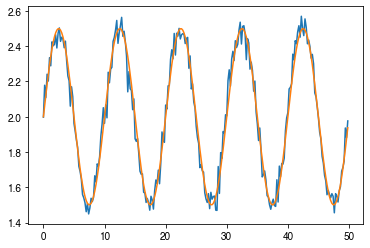

In [3]:
t, rate = count_arrival(x, 0.2, max_=50)
rate = rate.mean(axis=0)
true_rate = 0.5 * np.sin(np.pi / 5 * t) + 2
plt.plot(t, rate)
plt.plot(t, true_rate)

In [4]:
x = np.log(x)
m = x.mean(axis=0)
t = np.arange(200)

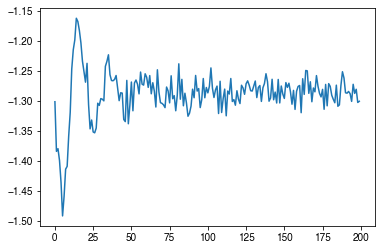

In [5]:
plt.plot(t, m)

In [6]:
def f(t, a, b, c, d, e):
    return a * np.cos(b * t + c) * np.exp(-d * t) + e

In [7]:
params, _ = optimize.curve_fit(f, t, m, p0=[0.1, 0.1, 0.1, 0.1, 0.1])

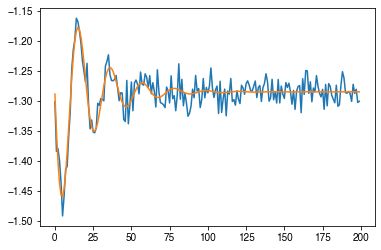

In [8]:
r = f(t, *params)
plt.plot(t, m)
plt.plot(t, r)

In [9]:
residual = x - r

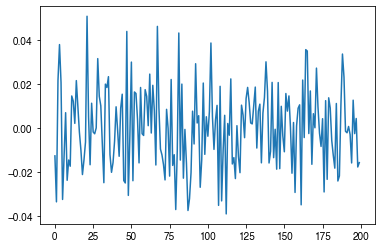

In [10]:
plt.plot(residual.mean(axis=0))